## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The  categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

## Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer


## Loading All the Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
#Loading dataset

data = pd.read_excel("Tourism.xlsx",sheet_name='Tourism')

data.head() # displaying the first 5 entries

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
data.tail() # displaying the last 5 entries

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [4]:
data.shape # shape of the given data set 

(4888, 20)

In [5]:
data.info() # basic information of the given data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
data.isna().sum() # checking for null values in the data set 

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
data.duplicated().sum() # checking for any duplicates

0

In [8]:
data.drop(["CustomerID"],axis=1,inplace=True) 

Dropping Customer ID as it is not a important feature

## Basic Statistical Analysis

In [9]:
data.describe(include="all").T # to show mean,median,frequency,std,25%,50%,75%,min,max and count of all the columns in the data set 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888,NaN,NaN,NaN,0.188216,0.390925,0,0,0,0,1
Age,4662,NaN,NaN,NaN,37.6223,9.31639,18,31,36,44,61
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888,NaN,NaN,NaN,1.65426,0.916583,1,1,1,3,3
DurationOfPitch,4637,NaN,NaN,NaN,15.4908,8.51964,5,9,13,20,127
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888,NaN,NaN,NaN,2.90507,0.724891,1,2,3,3,5
NumberOfFollowups,4843,NaN,NaN,NaN,3.70845,1.00251,1,3,4,4,6
ProductPitched,4888,5,Basic,1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filling values

In [10]:
data["Age"].fillna(37, inplace=True)

Filling the null values with the mean age i.e 37

In [11]:
data["TypeofContact"].fillna("Self Enquiry", inplace=True)

Filling the null values with the most common form of Enquiry i.e Self Enquiry

In [12]:
data["DurationOfPitch"].fillna(0, inplace=True)

Filling the null values with 0 as it is Not Necessary that all the customers got a pitch from the company sales team

In [13]:
data["NumberOfFollowups"].fillna(0, inplace=True)

Filling the null values with 0 as it is Not Necessary that all the customers follwed up

In [14]:
data["PreferredPropertyStar"].fillna(3.5, inplace=True)

Filling the null values with the mean property star i.e 3.5

In [15]:
data["NumberOfTrips"].fillna(3, inplace=True)

Filling the null values with the mean number of trips i.e 3

In [16]:
data["NumberOfChildrenVisiting"].fillna(1, inplace=True)

Filling the null value with the mean number of children i.e 1

In [17]:
data["MonthlyIncome"].mode() # finding mode 

0    17342.0
1    20855.0
2    21020.0
3    21288.0
dtype: float64

In [18]:
data["MonthlyIncome"].fillna(21288, inplace=True)

Filling the most common Income that is closest to the mean i.e 21288

In [19]:
data.isna().sum() # checking for null values

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Finding Counts thoughout all the columns 

In [20]:
cat_cols=['ProdTaken','TypeofContact','CityTier','Occupation','Gender','PreferredPropertyStar','NumberOfPersonVisiting','MaritalStatus','PitchSatisfactionScore','Designation','MonthlyIncome','ProductPitched']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
3.0    2993
5.0     956
4.0     913
3.5      26
Name: PreferredPropertyStar, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionS

We see that :
* Most of the cusomters havent taken the product (3968)
* Self enquiry is the most preferred mode of contact (3469)
* Most common City tier is Tier 1(3190)
* Most common Type of Revenue is Salaried(2368) followed by Small Business (2084)
* Most Preferred Property Star is 3(2993)
* Most number of Person Visting is 3(2402)
* Most of the customers are married (2340)
* Most of the customers give a pitch satisfaction score of 3 (1478)
* Most Common designation of customers are Executive (1842) followed by Manager(1732)
* Most Common monthly income is 21288 (240)
* Most common product pitched are the Basic(1842) followed by Deluxe(1732)

In [21]:
Gender_df=data.copy() # finding the count of gender
Gender_df["Gender"]=data["Gender"].apply(lambda x:x.rstrip(" ")[0])
Gender_df["Gender"].value_counts()

M    2916
F    1972
Name: Gender, dtype: int64

Most of the customers are Males

## EDA

## Univariate Analysis

In [22]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'blue') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='violet', linestyle='--') #  mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') #  median to the histogram

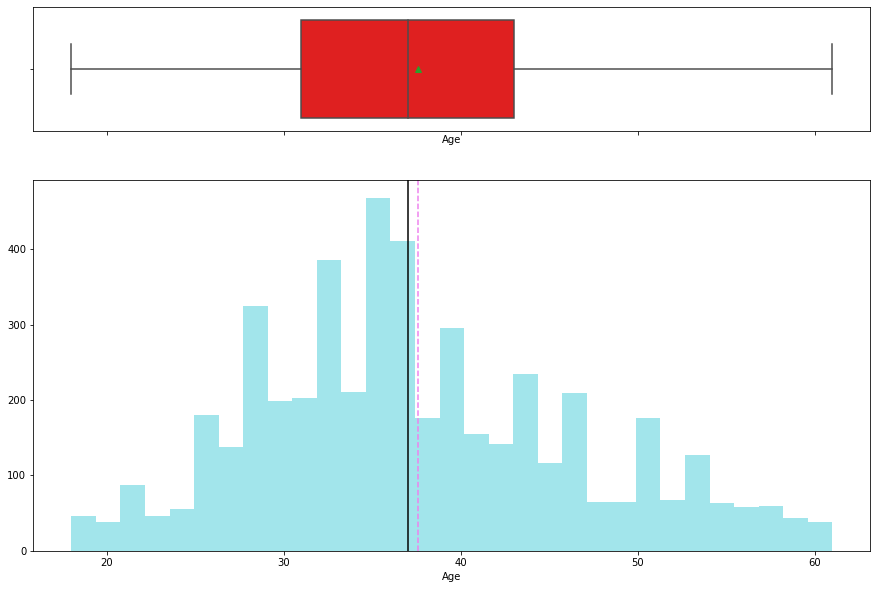

In [23]:
histogram_boxplot(data['Age']) # plotting Age 

* The Age variable seems to be fairly symmetrical about mean and median.
* The mean and median age of customers is equal to ~38 years.
* Some customers are older than 60

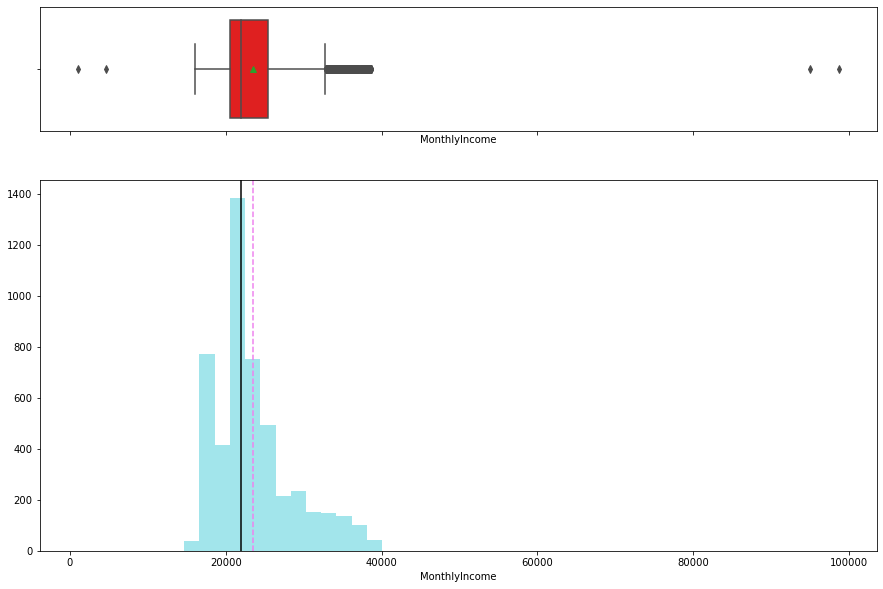

In [24]:
histogram_boxplot(data['MonthlyIncome']) # Plotting Monthly income

* The distribution of Monthly Income is skewed to right.
* Most of the customers have above 20000 

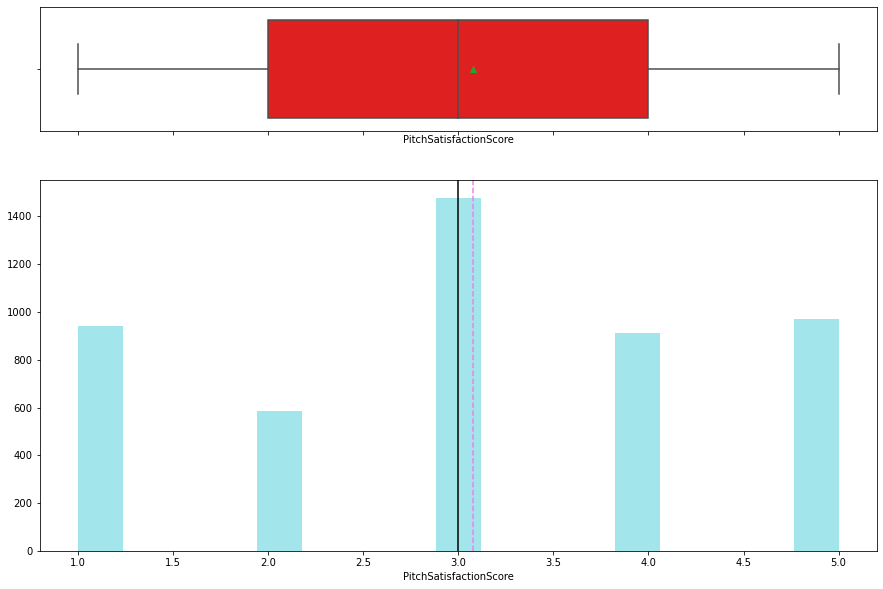

In [25]:
histogram_boxplot(data['PitchSatisfactionScore'])  # Plotting Pitch Satisfaction Score

Confirmation of What we have seen before most of the customers gave 3 as a score

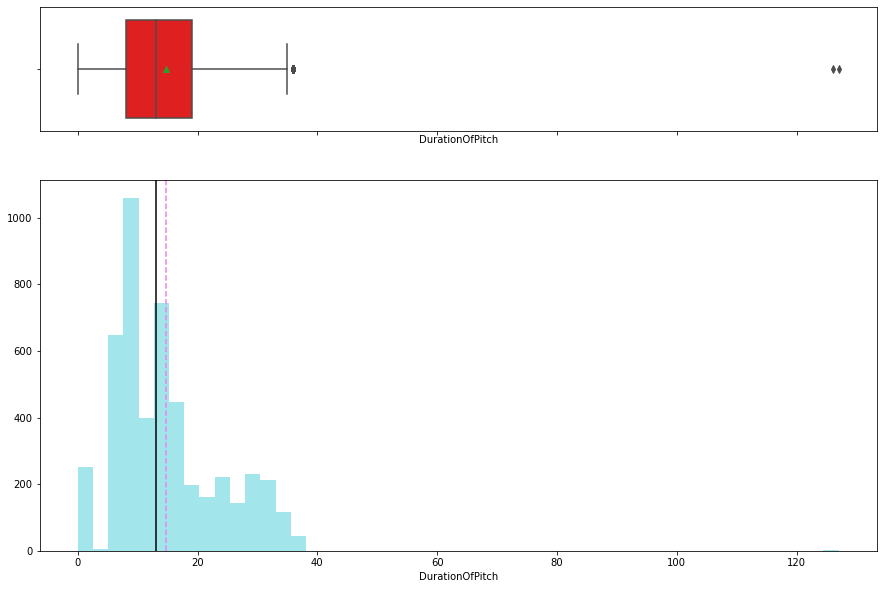

In [26]:
histogram_boxplot(data['DurationOfPitch']) # plotting Duration of Pitch

* The distribution of Duration Of Pitch is skewed to right.
* Most of the customers  were given pitches for 15 min

In [27]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

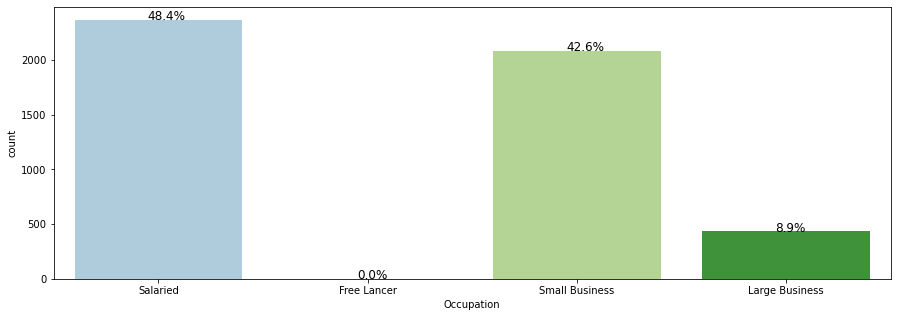

In [28]:
perc_on_bar('Occupation') # plotting Occupation

* 48.4% of customers are Salaried followed by 42.6% customers having small Businesses
* There are no free lancers and very less(8.9%) Large Bussiness

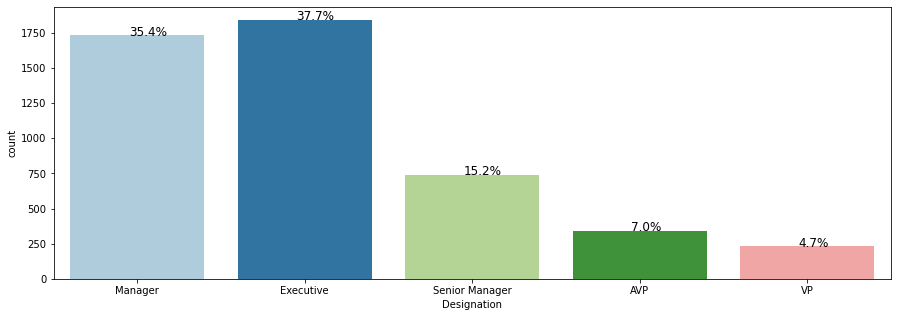

In [29]:
perc_on_bar('Designation') # Plotting Designation

* 37.7% customersare Executives followed by 35.4% Managers
* only 4.7% customers are VP

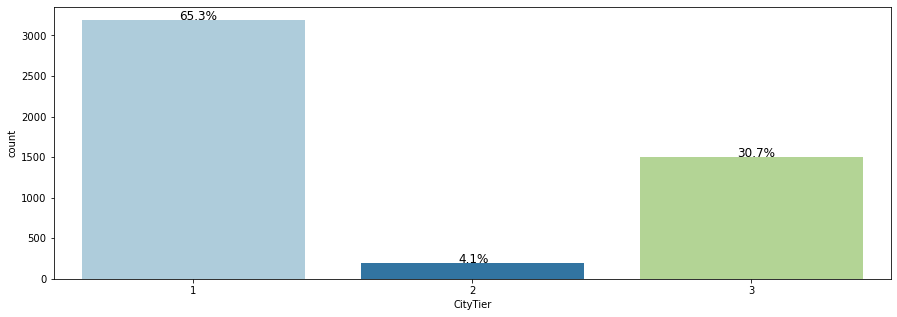

In [30]:
perc_on_bar('CityTier') # Plotting City Tier

* 65.3% customers are from Tier 1 cities
* Only 4.1% customers are from Tier 2 cities 

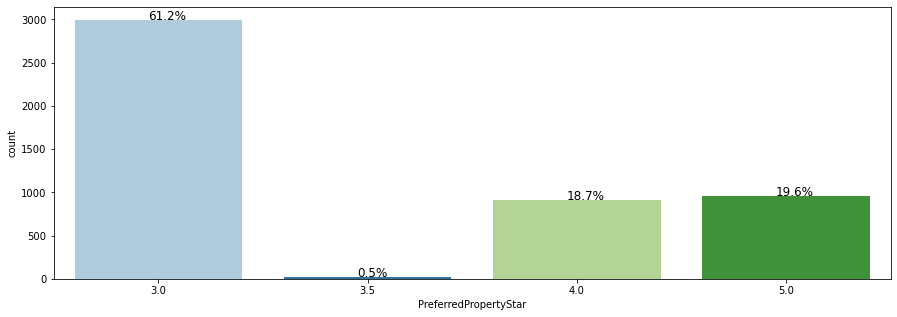

In [31]:
perc_on_bar('PreferredPropertyStar') # Plotting Preferred Property Star 

* 61.2% customers prefer a star rating of 3 
* Only 0.5% customers prefer 3.5

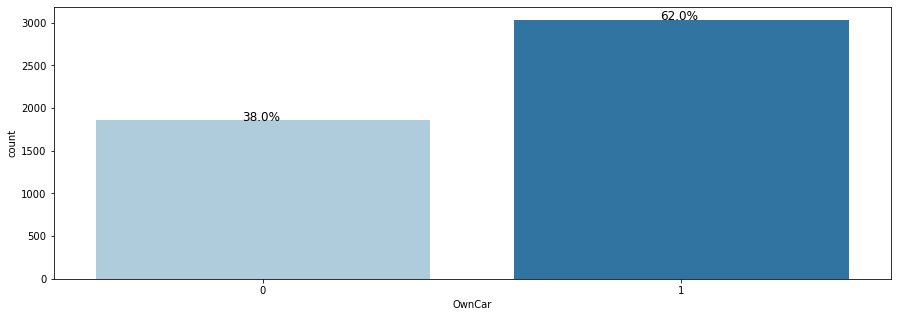

In [32]:
perc_on_bar('OwnCar') # Plotting the number of customers having their own Car

* 62% cusomters have their own car

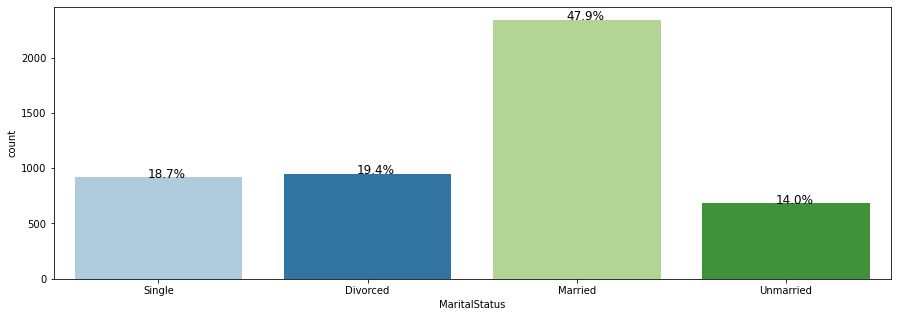

In [33]:
perc_on_bar('MaritalStatus') # Plotting Marital Status

* 47.9% customers are married 
* Only 14% are unmarried

## Bivariate Analysis

In [34]:
data.corr() # finding correlations

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.143755,0.086852,0.072568,0.009627,0.106103,0.099204,0.019709,0.260844,0.051394,-0.011508,0.008009,-0.124779
Age,-0.143755,1.000000,-0.014352,0.018323,0.013817,0.002630,-0.011015,0.172628,0.032529,0.017803,0.047468,0.005279,0.458965
CityTier,0.086852,-0.014352,1.000000,0.005800,-0.001671,0.012349,-0.009053,-0.028749,0.001793,-0.042160,0.003817,0.000578,0.052634
DurationOfPitch,0.072568,0.018323,0.005800,1.000000,0.116112,0.047715,-0.002907,0.031922,0.037604,-0.001146,-0.006782,0.072655,0.049991
NumberOfPersonVisiting,0.009627,0.013817,-0.001671,0.116112,1.000000,0.327334,0.033304,0.190113,0.011177,-0.019581,0.010362,0.606321,0.205644
NumberOfFollowups,0.106103,0.002630,0.012349,0.047715,0.327334,1.000000,-0.024687,0.135994,0.011120,-0.000649,0.009758,0.279352,0.192946
PreferredPropertyStar,0.099204,-0.011015,-0.009053,-0.002907,0.033304,-0.024687,1.000000,0.011634,0.001063,-0.022832,0.015416,0.034150,0.009266
NumberOfTrips,0.019709,0.172628,-0.028749,0.031922,0.190113,0.135994,0.011634,1.000000,0.012926,-0.004501,-0.012164,0.161022,0.118289
Passport,0.260844,0.032529,0.001793,0.037604,0.011177,0.011120,0.001063,0.012926,1.000000,0.002926,-0.022330,0.020244,0.004027
PitchSatisfactionScore,0.051394,0.017803,-0.042160,-0.001146,-0.019581,-0.000649,-0.022832,-0.004501,0.002926,1.000000,0.068850,0.000251,0.028192


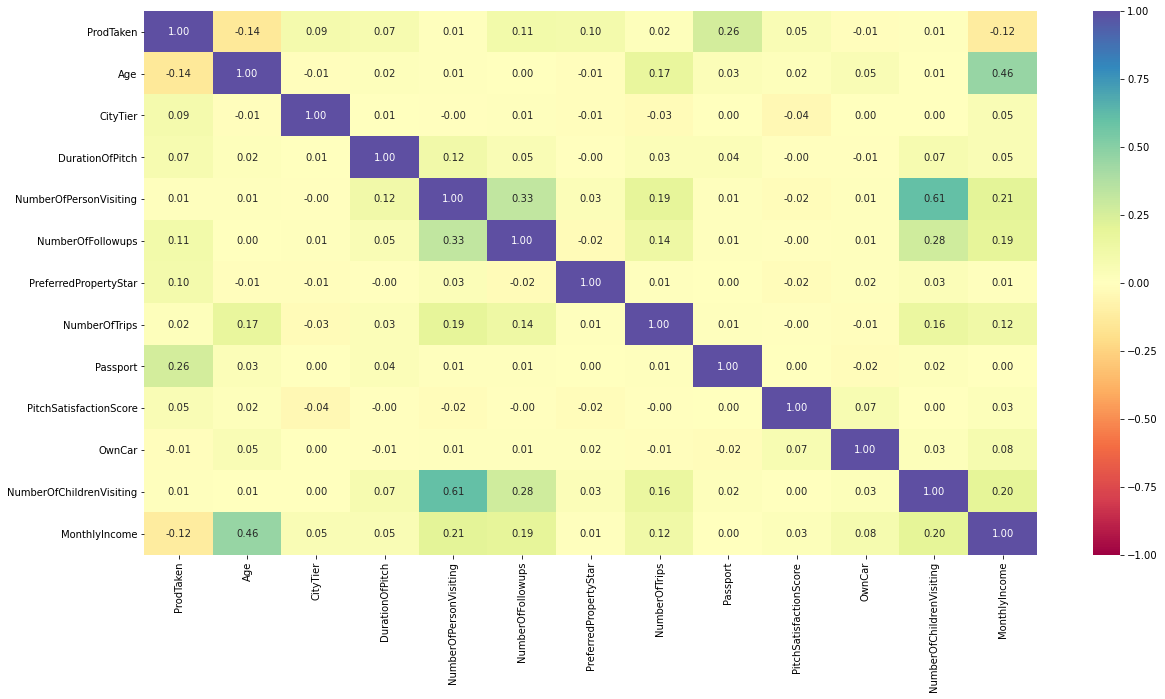

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral" )
plt.show()

We observe that:
* Monthly income and Product Taken have a negative weak correlation(-0.12)
* Age and Product Taken have a negative weak correlation(-0.14)
* Product Taken and Passport have a weak Positive correlation(0.26)
* Age and Monthly Income have a positive correlation(0.46)
* Monthly Income and Number of Person Visting have a positive correlation (0.21)
* Number of follow ups and Number of Person visting have a positive correlation(0.33)
* Number of Trips and Number of children have a positive correlation(0.16)
* Monthly income and number of trips have a positive correlation(0.12)
* Number of trips and number of follow ups have a positive correlation(0.14)
* Number of trips and number of Person visiting have a positive correlation(0.19)
* Number of children Visting and Monthlyincome have a positive Correlation(0.20)


## Multivariate Analysis

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

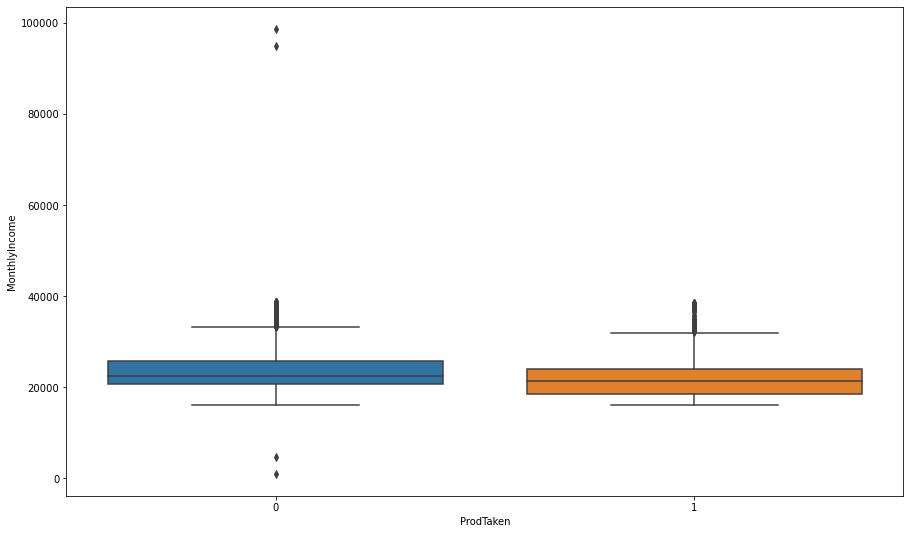

In [36]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="ProdTaken", y="MonthlyIncome", data=data)

Most of the customers that have taken the product have an income of 20000

<AxesSubplot:xlabel='PreferredPropertyStar', ylabel='MonthlyIncome'>

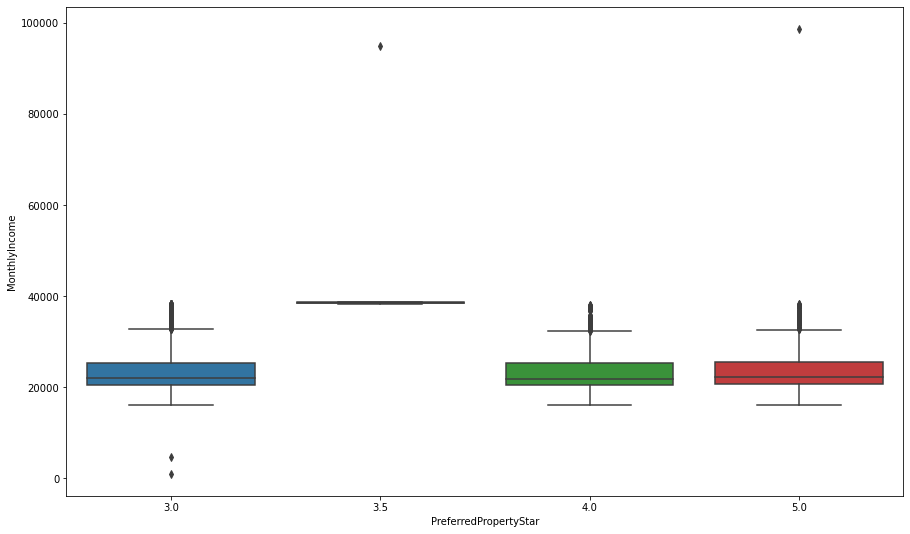

In [37]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="PreferredPropertyStar", y="MonthlyIncome", data=data)

Customers having 40000 prefer property having 3.5 rating however most of the customers having a monthly income of 20000 prefer 3,4 and 5 star ratings.

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

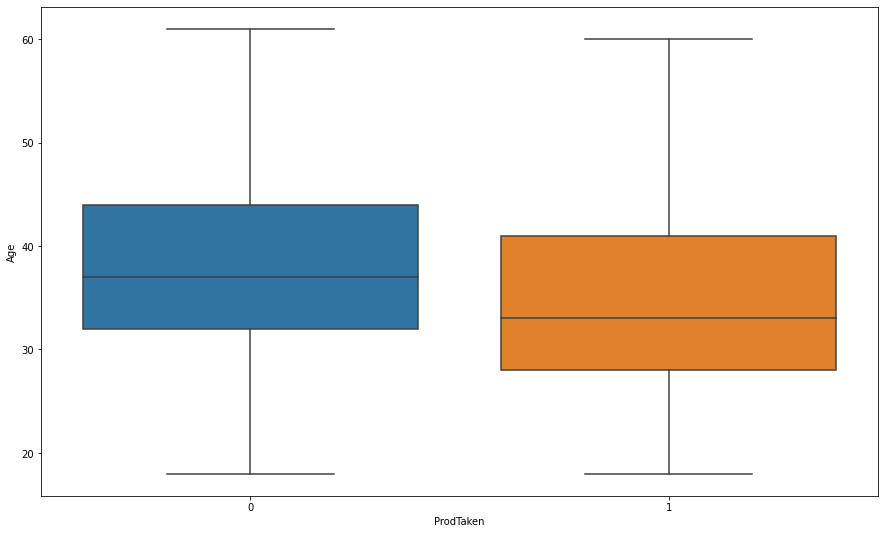

In [38]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="ProdTaken", y="Age", data=data)

Customers of an age gap of 28-40 have already taken the product

<AxesSubplot:xlabel='Passport', ylabel='ProdTaken'>

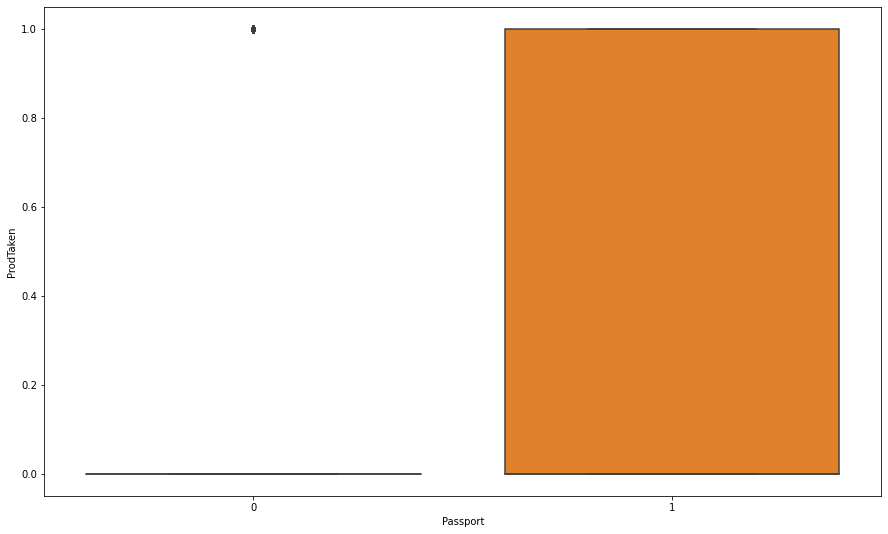

In [39]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="Passport", y="ProdTaken", data=data)

Customers having a passport have taken the product

<AxesSubplot:xlabel='NumberOfTrips', ylabel='Age'>

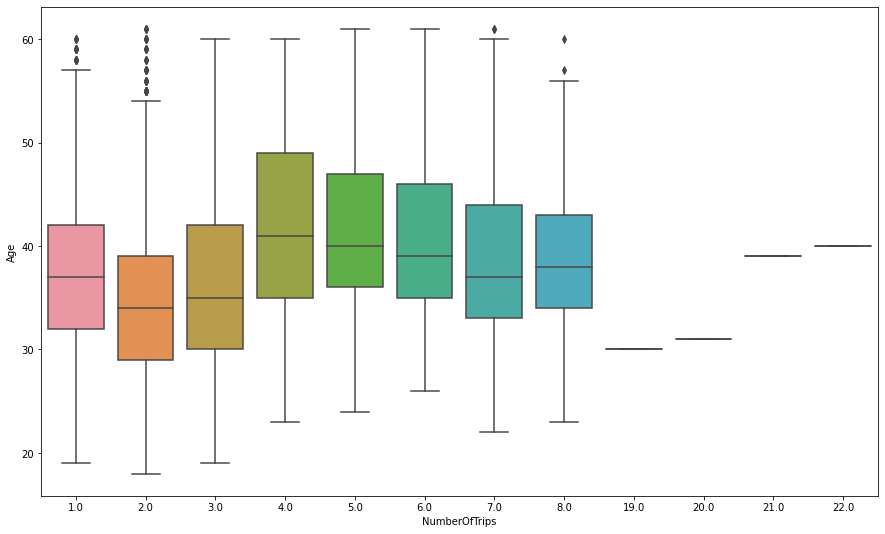

In [40]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="NumberOfTrips", y="Age", data=data)

Most of the customers between 35-50 have taken 4 Trips 

<AxesSubplot:xlabel='NumberOfTrips', ylabel='NumberOfPersonVisiting'>

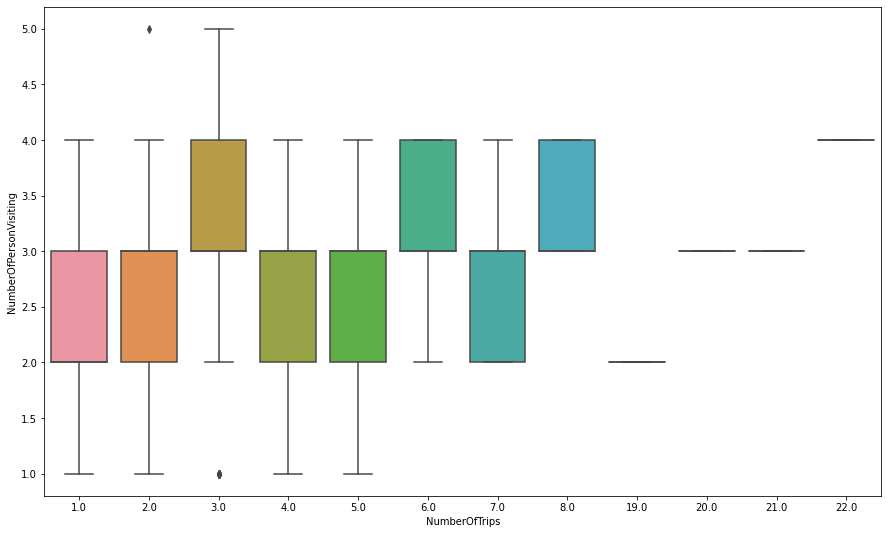

In [41]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="NumberOfTrips", y="NumberOfPersonVisiting", data=data)

number of trips increase when it is 3 People visiting

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='MonthlyIncome'>

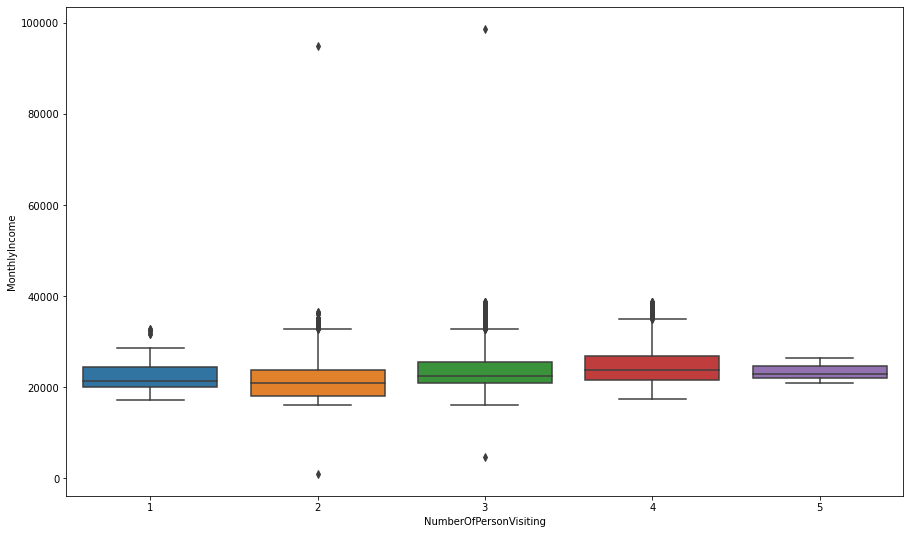

In [42]:
plt.figure(figsize=(15, 9))
sns.boxplot(y="MonthlyIncome", x="NumberOfPersonVisiting", data=data)

Customers having 4 People Visiting have higher monthly incomes 

<AxesSubplot:xlabel='NumberOfTrips', ylabel='MonthlyIncome'>

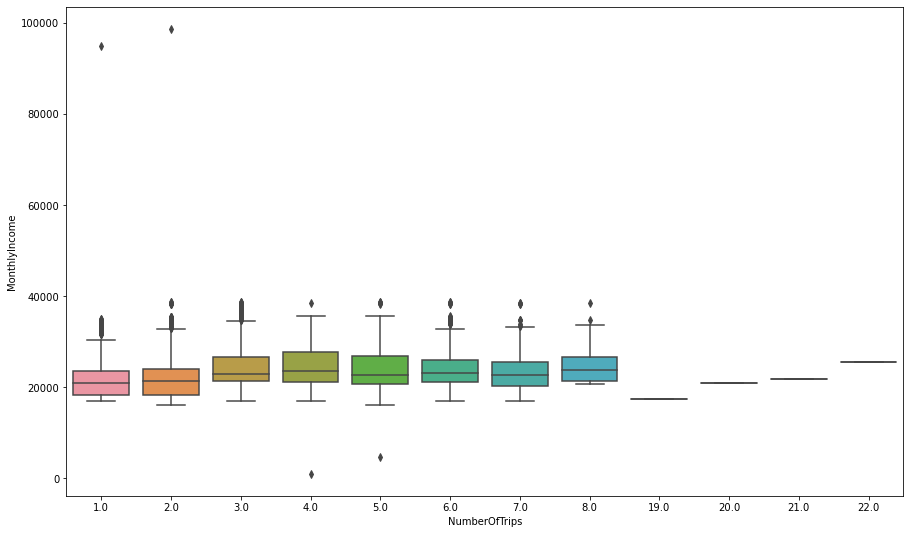

In [43]:
plt.figure(figsize=(15, 9))
sns.boxplot(y="MonthlyIncome", x="NumberOfTrips", data=data)

As the Monthly Income increases the number of trips increase 

<AxesSubplot:xlabel='NumberOfChildrenVisiting', ylabel='MonthlyIncome'>

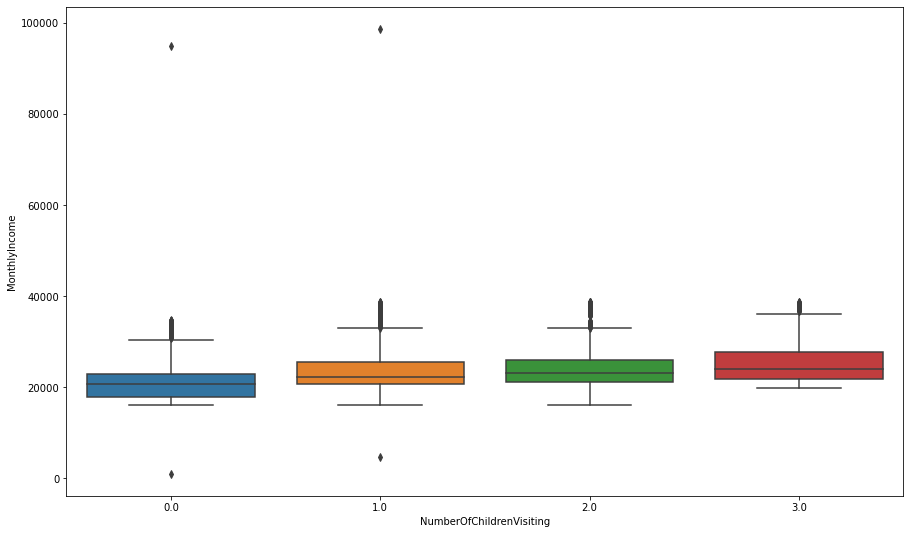

In [44]:
plt.figure(figsize=(15, 9))
sns.boxplot(y="MonthlyIncome", x="NumberOfChildrenVisiting", data=data)

Customers having 3 children have higher incomes

In [45]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

## ProdTaken VS Occupation

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


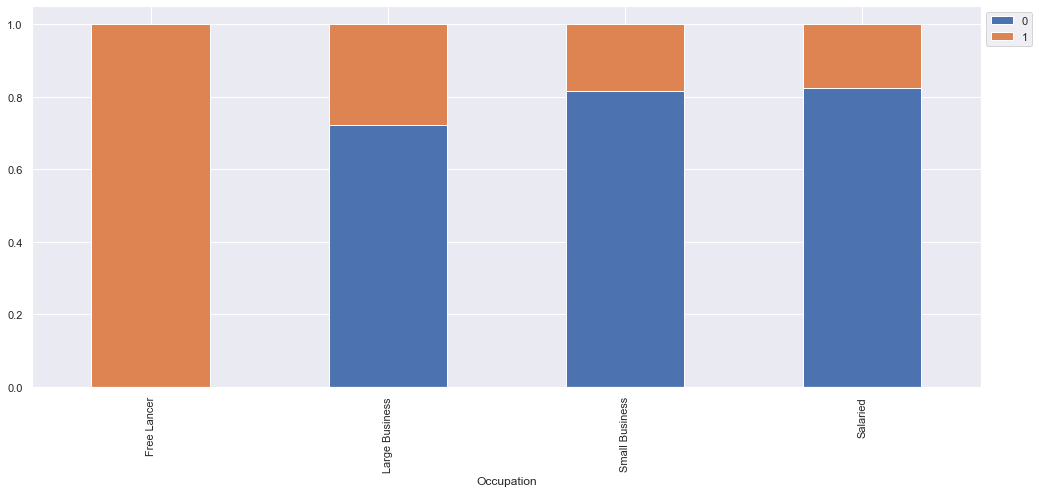

In [46]:
stacked_plot(data['Occupation']) # plotting Occupation

* Customers having Large Bussiness  have taken the product mostly.
* Small Business and Salaried customers have taken the product Equally 


## ProdTaken VS Product Pitched

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


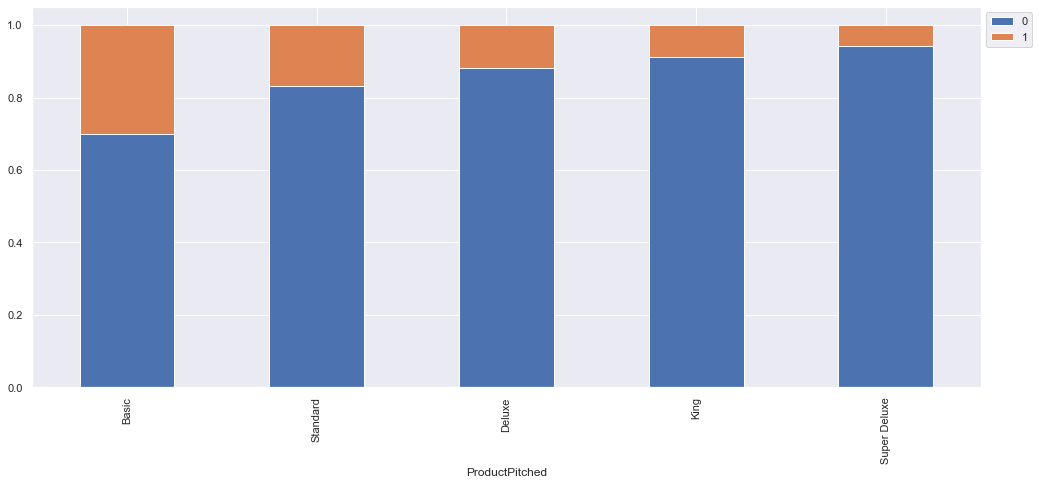

In [47]:
stacked_plot(data['ProductPitched'])

More customers are prone to take Basic and Standard Products

## ProdTaken VS CityTier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


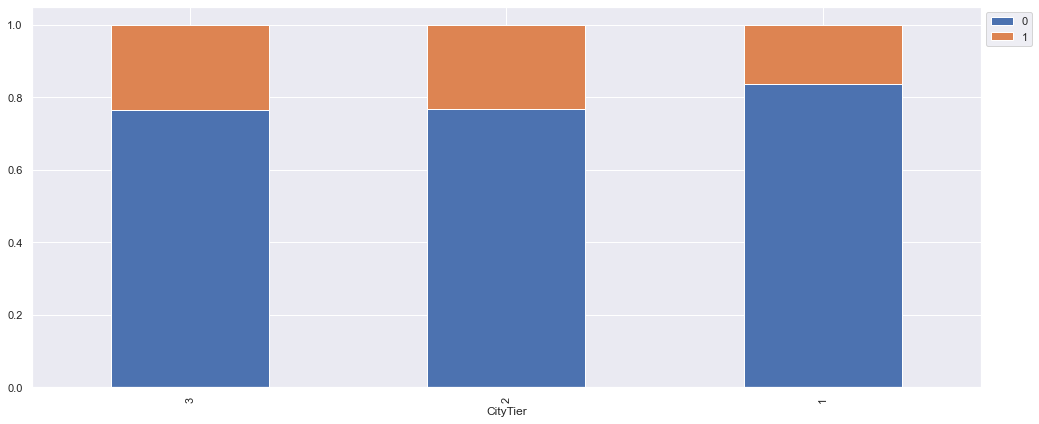

In [48]:
stacked_plot(data['CityTier'])

Customers from Tier 2 and Tier 3 Cities have mostly taken the Product

## ProdTaken VS Number of Trips

ProdTaken         0    1   All
NumberOfTrips                 
All            3968  920  4888
2.0            1165  299  1464
3.0             990  229  1219
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


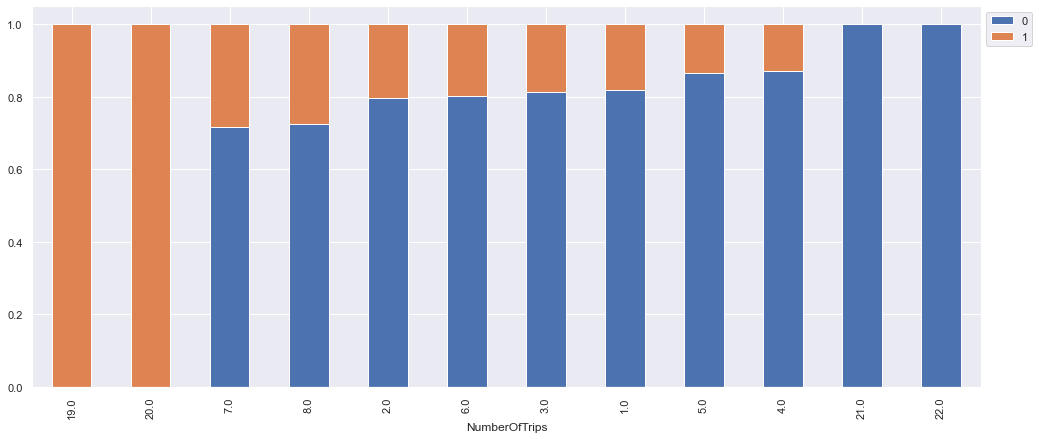

In [49]:
stacked_plot(data['NumberOfTrips'])

Customers Taking 7-8 Trips have taken the product followed by customers taking 2, 3 and 6 trips 

## ProdTaken VS Number of Follow ups 

ProdTaken             0    1   All
NumberOfFollowups                 
All                3968  920  4888
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
0.0                  37    8    45
------------------------------------------------------------------------------------------------------------------------


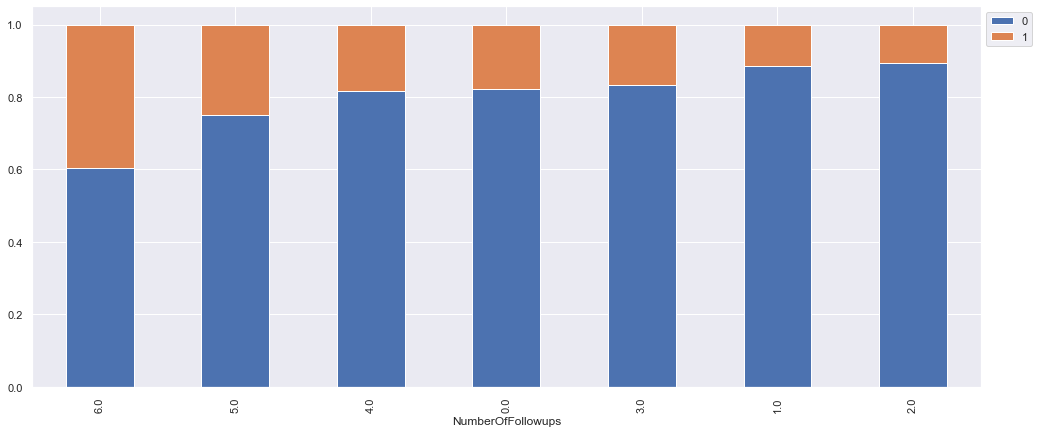

In [50]:
stacked_plot(data['NumberOfFollowups'])

Customers making 3-6 follow ups have taken the product 

## ProdTaken VS Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


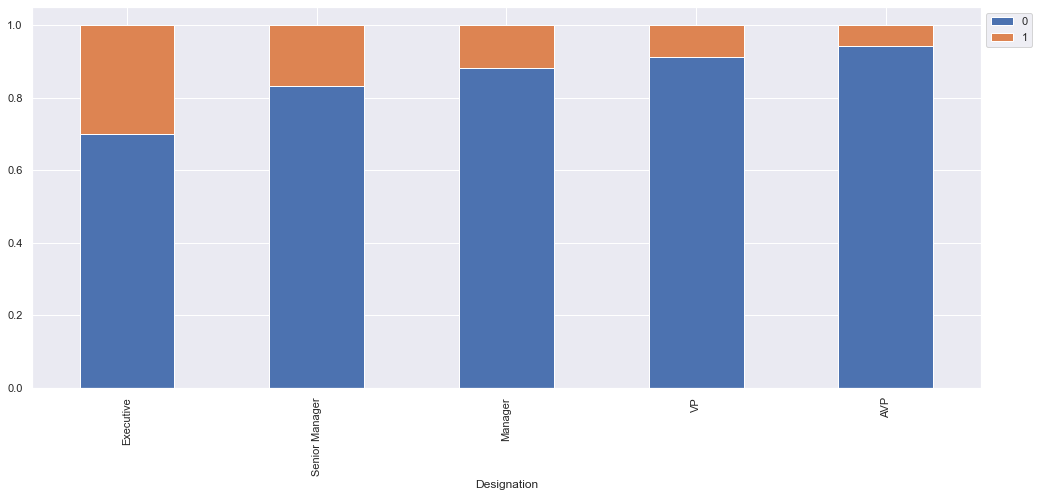

In [51]:
stacked_plot(data['Designation'])

Senior Managers and Executives are more prone to take the product 

In [52]:
### Function to plot distributions and Boxplots of customers

def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x}  of customer who have taken the package',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}  of customer who did not take the package",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t taken package',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t not taken package - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

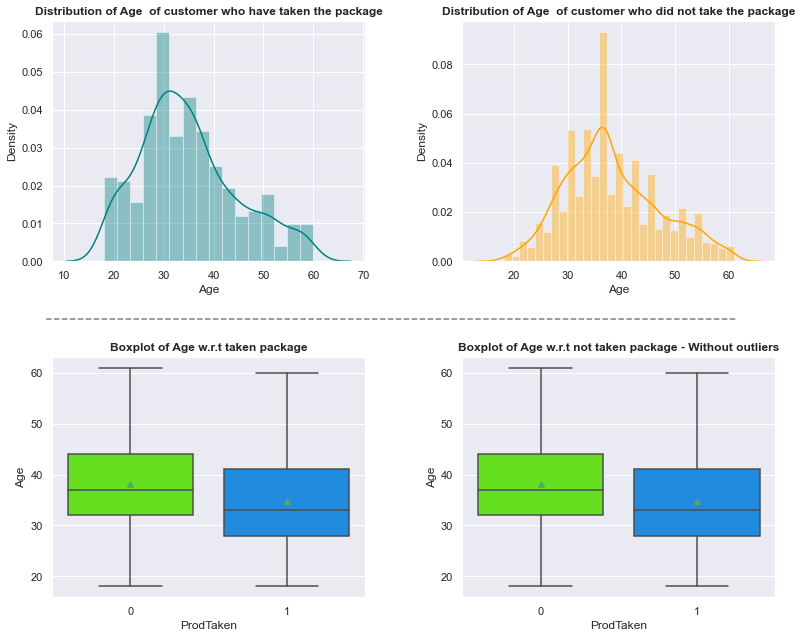

In [53]:
plot('Age') # plotting age

No significant Information

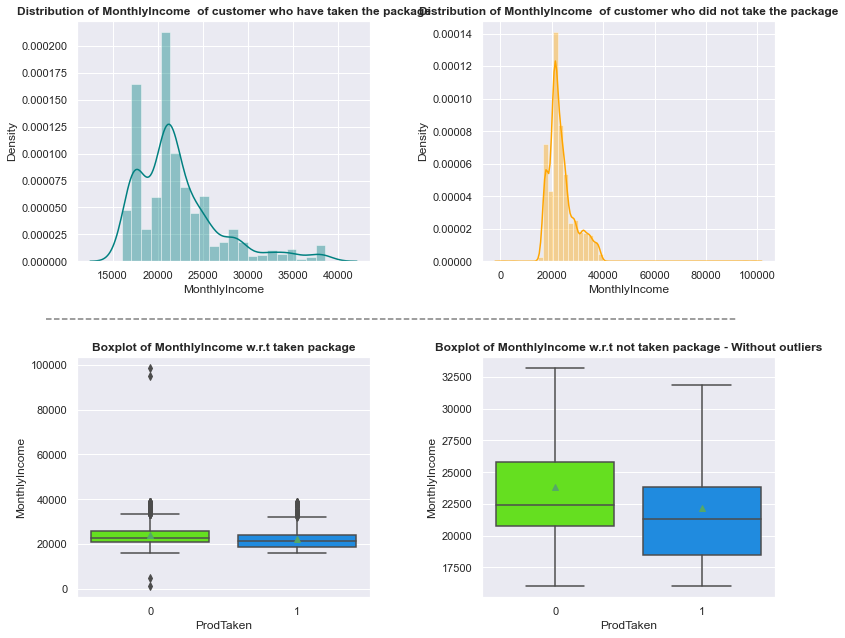

In [54]:
plot('MonthlyIncome') # plotting Monthly Income 

Customers that have taken the package have a lower monthly income than customers that have not 

## Finding the Outliers

In [55]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [56]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

ProdTaken                   18.821604
Age                          0.000000
CityTier                     0.000000
DurationOfPitch              0.941080
NumberOfPersonVisiting       0.061375
NumberOfFollowups            7.303601
PreferredPropertyStar        0.000000
NumberOfTrips                2.229951
Passport                     0.000000
PitchSatisfactionScore       0.000000
OwnCar                       0.000000
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.671849
dtype: float64

## Creating Dummies

In [57]:
# Separating features and the target column
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

X = pd.get_dummies(X, columns=['Occupation','Gender','TypeofContact','ProductPitched','MaritalStatus','Designation'],drop_first=True)


## Splitting the Dataset

In [58]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [59]:
X_train.shape, X_test.shape

((3421, 29), (1467, 29))

## Building Models

In [60]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [61]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

Accuracy on training set :  0.6600409237065186
Accuracy on test set :  0.6823449216087253
Recall on training set :  0.7259615384615384
Recall on test set :  0.722972972972973
Precision on training set :  0.3134948096885813
Precision on test set :  0.35785953177257523
F1 on training set :  0.4378927017883035
F1 on test set :  0.47874720357941836


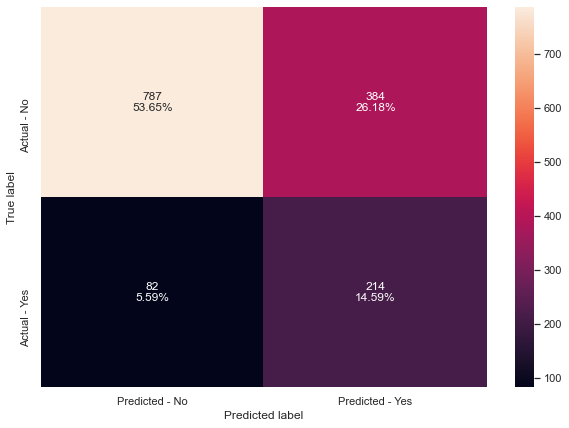

In [62]:
model = LogisticRegression(random_state=1,class_weight="balanced")
lg = model.fit(X_train,y_train)

# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

# checking model performance
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)

## ROC-AUC

## Training Set

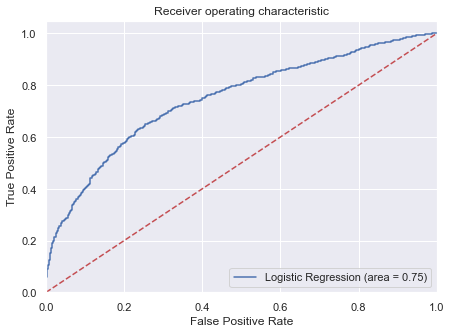

In [63]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Testing Set

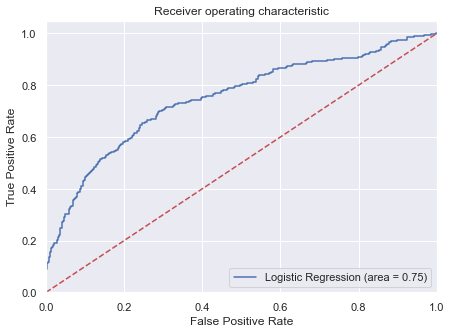

In [64]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Logistic Regression is giving a generalised good performance on training and testing set 

## Finding the coefficients 

In [65]:
log_odds = lg.coef_[0]
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
coef,-0.03607,0.30718,0.03554,0.01130,0.35609,0.27524,-0.09309,0.48228,0.15913,-0.00178,...,-0.00342,0.01349,-0.05297,-0.17485,0.22683,0.06191,0.26086,-0.20747,0.01349,-0.00342


### Odds from Coefficients

In [66]:
odds = np.exp(lg.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,TypeofContact_Self Enquiry,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
odds,0.96457,1.35959,1.03618,1.01137,1.42774,1.31685,0.91111,1.61976,1.17249,0.99822,1.00468,0.99990,1.06698,0.95272,0.98960,0.96214,1.05052,0.93830,0.81264,0.99659,1.01358,0.94840,0.83958,1.25461,1.06387,1.29804,0.81264,1.01358,0.99659


### Percentage change in odds

In [67]:
perc_change_odds = (np.exp(lg.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,TypeofContact_Self Enquiry,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
change_odds%,-3.54286,35.95880,3.61838,1.13685,42.77366,31.68506,-8.88902,61.97641,17.24870,-0.17772,0.46766,-0.01040,6.69792,-4.72813,-1.04007,-3.78587,5.05152,-6.17010,-18.73612,-0.34141,1.35840,-5.15959,-16.04193,25.46143,6.38693,29.80413,-18.73612,1.35840,-0.34141


### Coefficient interpretations

* Age: Holding all other features constant a 1 unit change in Age will decrease the odds of a customer taking the product by 3.54% decrease in the odds.
* Number of follow ups: Holding all other features constant a 1 unit change in number of follow ups will increase the odds of taking the product by 42.77% increase in the odds.
* CityTier: Holding all other features constant a 1 unit change in CityTier will increase the odds of a customer taking theproduct by 35.95% increase in the odds.
* Passport: Holding all other features constant a 1 unit change in the Passport will increase the odds of a customer taking the product by 61.97%
* PrefferPropertyStar:Holding all other features constant a 1 unit change in the PreferredPropertyStar will increase the odds of a customer taking the product by 31.68%
* ProductPitched_deluxe: Holding all other features constant a 1 unit change in ProductPitched_deluxe will decrease the odds of a customer taking the product by 18.73% decrease in the odds.    
* MaritalStatus_Single:Holding all other features constant a 1 unit change in the MaritalStatus_single will increase the odds of a customer taking the product by 25.46%
* Designation_Executive:Holding all other features constant a 1 unit change in the Designation_Executive will increase the odds of a customer taking the product by 29.8%  

## Improving the  Model Performance 

In [68]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.5230078209190571


In [69]:
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.6845951476176556
Accuracy on test set :  0.7075664621676891
Recall on training set :  0.7019230769230769
Recall on test set :  0.6959459459459459
Precision on training set :  0.3290758827948911
Precision on test set :  0.3779816513761468
F1 on training set :  0.448081841432225
F1 on test set :  0.48989298454221164
ROC-AUC Score on training set :  0.6913262149005802
ROC-AUC Score on test set :  0.7032248944076442


* Recall has decreased as compared to the previous model.
* Area under the curve  has increased as compared to the initial model.

## Sequential Selector

In [70]:
!pip install mlxtend 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

## Creating Dummies

In [71]:
# Separating features and the target column
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

X = pd.get_dummies(X, columns=['Occupation','Gender','TypeofContact','ProductPitched','MaritalStatus','Designation'],drop_first=True)


## Spliting the Dataset

In [72]:
# Splitting the data into train and test sets in 70:30 ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [73]:
# Fit the model on train
model = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [74]:
X_train2.shape, X_test2.shape

((3421, 29), (1467, 29))

In [75]:
sfs = SFS(model, k_features=29, forward=True, floating=False, scoring='recall', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train2, y_train2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    3.7s finished

[2021-07-16 19:47:34] Features: 1/29 -- score: 0.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.9s finished

[2021-07-16 19:47:36] Features: 2/29 -- score: 0.07692307692307693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.3s finished

[2021-07-16 19:47:38] Features: 3/29 -- score: 0.2516025641025641[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    2.2s finished

[2021-07-16 19:47:41] Features: 4/29 -- score: 0.2548076923076923[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Para

The Score stabilises from feature 20 

In [76]:
sfs1 = SFS(model, k_features=20, forward=True, floating=False, scoring='recall', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.8s finished

[2021-07-16 19:48:20] Features: 1/20 -- score: 0.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.5s finished

[2021-07-16 19:48:22] Features: 2/20 -- score: 0.07692307692307693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.7s finished

[2021-07-16 19:48:24] Features: 3/20 -- score: 0.2516025641025641[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   

In [77]:
feat_cols = list(sfs1.k_feature_idx_)# finding the important columns 
print(feat_cols)

[0, 1, 4, 6, 7, 8, 9, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28]


In [78]:
X_train2.columns[feat_cols] # names of important columns 

Index(['Age', 'CityTier', 'NumberOfFollowups', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Occupation_Small Business',
       'Gender_Male', 'TypeofContact_Self Enquiry', 'ProductPitched_Deluxe',
       'ProductPitched_King', 'ProductPitched_Standard',
       'ProductPitched_Super Deluxe', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

In [79]:
X_train_final = X_train2[X_train2.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test2[X_train_final.columns]

In [80]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)


logreg.fit(X_train_final, y_train2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

Accuracy on training set :  0.8450745396083017
Accuracy on test set :  0.8377641445126107
Recall on training set :  0.2932692307692308
Recall on test set :  0.2939189189189189
Precision on training set :  0.6727941176470589
Precision on test set :  0.75
F1 on training set :  0.4084821428571429
F1 on test set :  0.4223300970873787


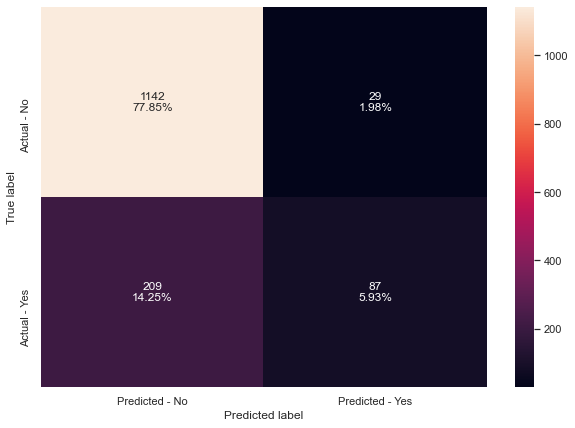

In [81]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train2,y_test2,flag=True)

# creating confusion matrix
make_confusion_matrix(logreg,X_test_final,y_test)

* Model is giving a generalized performance on training and test set.
* With a fewer number of features, the model is not performing well if compared to the other logistic regression models.

## Decission Tree Model

In [82]:
# Separating features and the target column
X = data.drop('ProdTaken', axis=1)
Y = data['ProdTaken']

X = pd.get_dummies(X, columns=['Occupation','Gender','TypeofContact','ProductPitched','MaritalStatus','Designation'],drop_first=True)

#Splitting data in train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [83]:
from sklearn import tree # importing tree 
dTree =tree.DecisionTreeClassifier(criterion ='gini',random_state=1)
dTree.fit(X_train1,y_train1)

DecisionTreeClassifier(random_state=1)

In [84]:
treeObj = dTree.tree_

print ('Total Nodes:',treeObj.node_count)# to see total number of nodes

print('Depth:',dTree.get_depth())# to find depth 

print('Total Leaves:',dTree.get_n_leaves())# to find the total number of leaves

Total Nodes: 735
Depth: 19
Total Leaves: 368


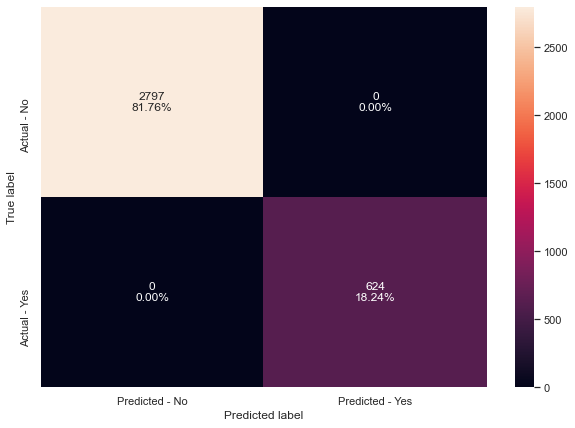

In [85]:
make_confusion_matrix(dTree,X_train1,y_train1)# confusion matrix of Train

0 errors on train data, all the samples were classified correctly 

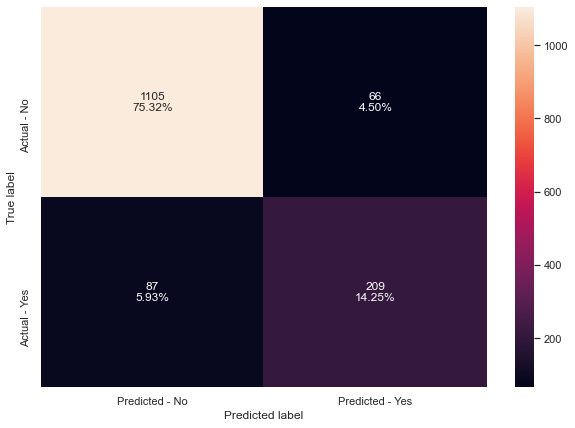

In [86]:
make_confusion_matrix(dTree,X_test1,y_test1)# confusion Matrix of test

In [87]:
score_DT = get_metrics_score(dTree,X_train1,X_test1,y_train,y_test,flag=True,roc=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.8957055214723927
Recall on training set :  1.0
Recall on test set :  0.706081081081081
Precision on training set :  1.0
Precision on test set :  0.76
F1 on training set :  1.0
F1 on test set :  0.7320490367775833
ROC-AUC Score on training set :  1.0
ROC-AUC Score on test set :  0.8248594986959633


In [88]:
y_pred = dTree.predict(X_test1)
recall_score(y_test1,y_pred)

0.706081081081081

* Model has performed  well on training and test set.
* Area under the curve is also 0.82 is quite good.

## Finding important Features

In [89]:
print(pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
MonthlyIncome               0.12636
DurationOfPitch             0.11812
Age                         0.10668
PitchSatisfactionScore      0.08383
Passport                    0.07866
Designation_Executive       0.06686
NumberOfTrips               0.06274
CityTier                    0.05759
NumberOfFollowups           0.05291
PreferredPropertyStar       0.03977
MaritalStatus_Single        0.02436
Occupation_Small Business   0.02392
TypeofContact_Self Enquiry  0.02121
MaritalStatus_Unmarried     0.02085
Gender_Male                 0.01853
MaritalStatus_Married       0.01848
NumberOfChildrenVisiting    0.01709
Occupation_Large Business   0.01323
OwnCar                      0.01205
Designation_Manager         0.00866
Occupation_Salaried         0.00779
NumberOfPersonVisiting      0.00758
Gender_Female               0.00503
ProductPitched_Deluxe       0.00311
ProductPitched_Standard     0.00186
ProductPitched_Super Deluxe 0.00128
Designation_VP              

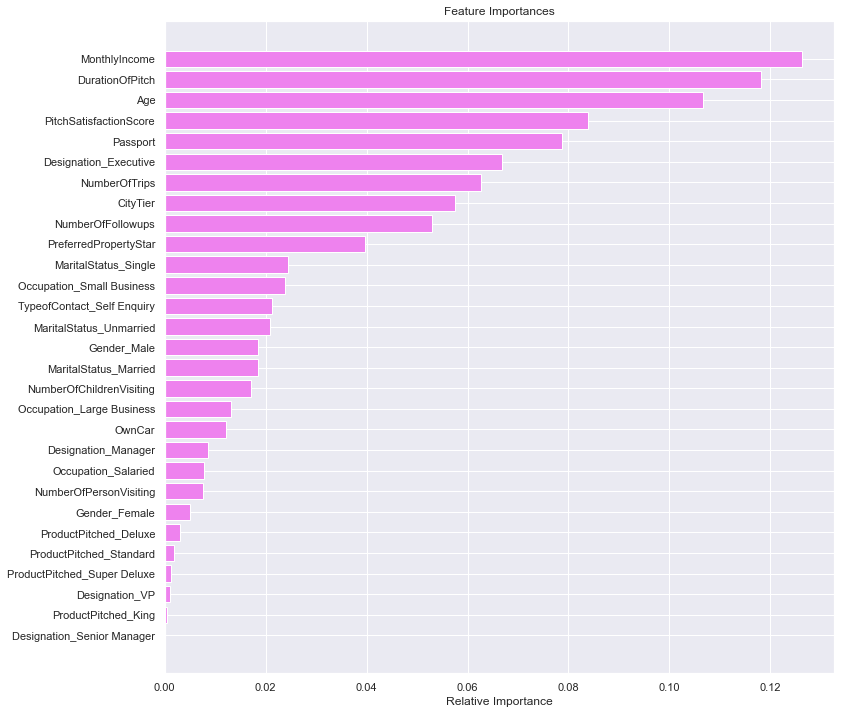

In [90]:
feature_names = X_train.columns
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Important Features in Decission Tree:
* Monthly Income
* Duration of Pitch
* Age
* Pitch Satisfaction Score
* Passport
* Designation_Executive
* Number of Trips
* City Tier
* Number of follow ups
* Preferred Property Star rating 


## HyperParameter Tuning 

In [91]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(6,15), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train1, y_train1)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=3, random_state=1)

In [92]:
# Let's check model performances for this model
scores_DT = get_metrics_score(estimator,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  0.8325051154633148
Accuracy on test set :  0.8152692569870484
Recall on training set :  0.3685897435897436
Recall on test set :  0.3108108108108108
Precision on training set :  0.5623471882640587
Precision on test set :  0.5786163522012578
F1 on training set :  0.44530493707647634
F1 on test set :  0.40439560439560435


The models Accuracy, Recall,Precission and F1 score has all decreased from the previous model

### Plotting the importance of each variable 

In [93]:
print(pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Passport                    0.56515
Designation_Executive       0.43485
Age                         0.00000
Gender_Female               0.00000
Designation_Senior Manager  0.00000
Designation_Manager         0.00000
MaritalStatus_Unmarried     0.00000
MaritalStatus_Single        0.00000
MaritalStatus_Married       0.00000
ProductPitched_Super Deluxe 0.00000
ProductPitched_Standard     0.00000
ProductPitched_King         0.00000
ProductPitched_Deluxe       0.00000
TypeofContact_Self Enquiry  0.00000
Gender_Male                 0.00000
Occupation_Small Business   0.00000
CityTier                    0.00000
Occupation_Salaried         0.00000
Occupation_Large Business   0.00000
MonthlyIncome               0.00000
NumberOfChildrenVisiting    0.00000
OwnCar                      0.00000
PitchSatisfactionScore      0.00000
NumberOfTrips               0.00000
PreferredPropertyStar       0.00000
NumberOfFollowups           0.00000
NumberOfPersonVisiting      

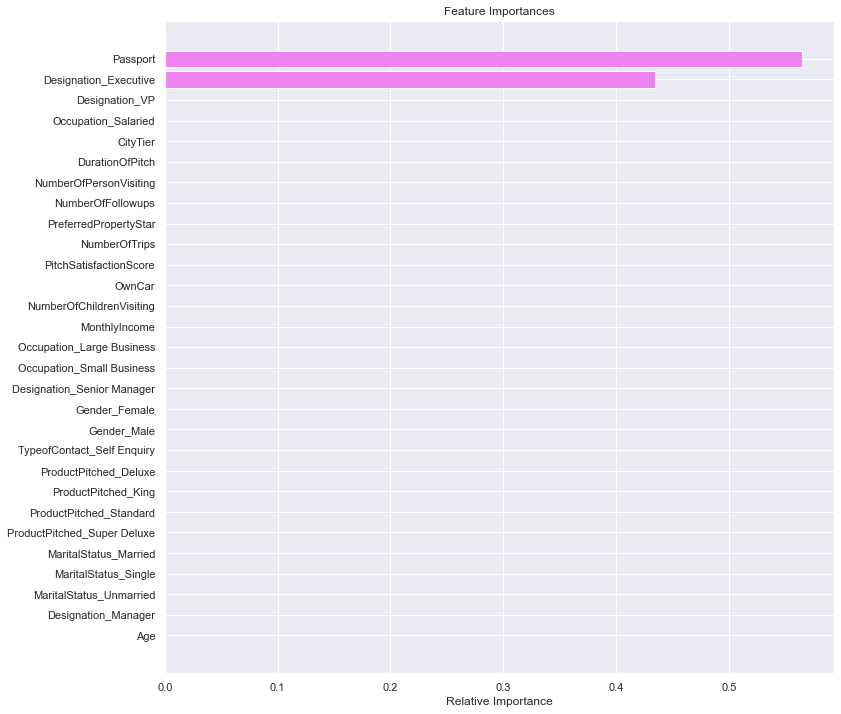

In [94]:
feature_names = X_train.columns
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Important Features in tuned Decission Tree:
* Passport
* Designation_Executive


## Random Forest Model

In [95]:
rf_estimator=RandomForestClassifier(random_state=1)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [96]:
rf_estimator_score=get_metrics_score(rf_estimator,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9025221540558964
Recall on training set :  1.0
Recall on test set :  0.5506756756756757
Precision on training set :  1.0
Precision on test set :  0.9421965317919075
F1 on training set :  1.0
F1 on test set :  0.695095948827292


The models performance has improved slightly more than the tuned decission tree

## HyperParameter Tuning 

In [97]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=None, random_state=1)

In [98]:
rf_tuned_score=get_metrics_score(rf_tuned,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9229720518064076
Recall on training set :  1.0
Recall on test set :  0.6722972972972973
Precision on training set :  1.0
Precision on test set :  0.9255813953488372
F1 on training set :  1.0
F1 on test set :  0.7788649706457926


* The model gives quite a good performance 
* The Tuned Random Forest Models performance is better than the Random Forest Models Performance

In [99]:
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Age                         0.12471
DurationOfPitch             0.12345
MonthlyIncome               0.12244
Passport                    0.08068
Designation_Executive       0.07418
NumberOfTrips               0.05931
PitchSatisfactionScore      0.05826
NumberOfFollowups           0.05058
CityTier                    0.04506
PreferredPropertyStar       0.03882
MaritalStatus_Single        0.02272
TypeofContact_Self Enquiry  0.02097
NumberOfChildrenVisiting    0.02041
NumberOfPersonVisiting      0.01824
MaritalStatus_Married       0.01644
Occupation_Large Business   0.01637
MaritalStatus_Unmarried     0.01605
Occupation_Small Business   0.01456
Gender_Female               0.01396
OwnCar                      0.01323
Occupation_Salaried         0.01185
Gender_Male                 0.01080
Designation_Manager         0.00707
ProductPitched_Deluxe       0.00626
ProductPitched_Standard     0.00460
Designation_Senior Manager  0.00416
ProductPitched_Super Deluxe 

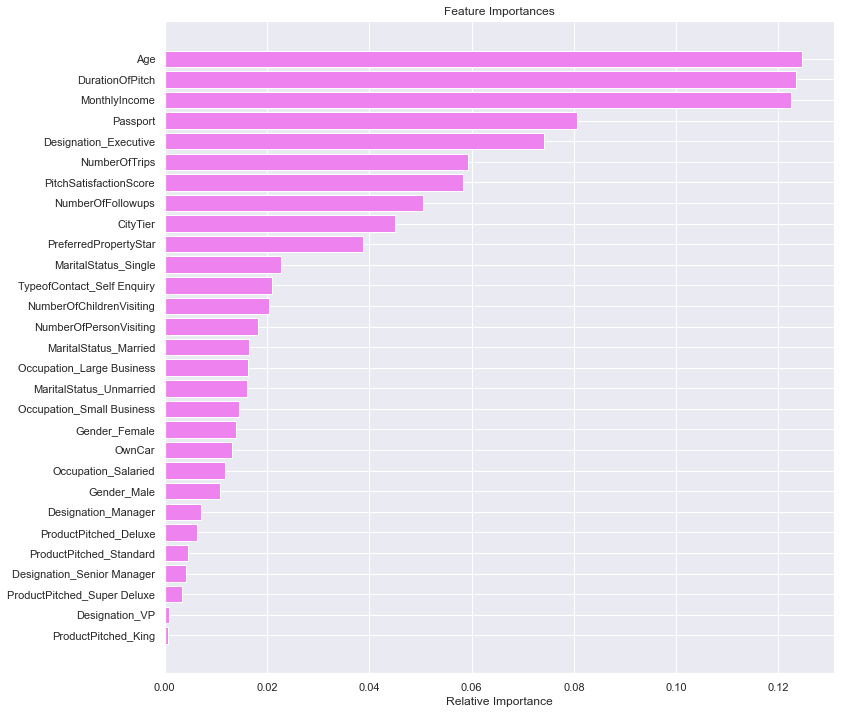

In [100]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Important Features in Tuned Random Forest :
* Age
* Duration of Pitch
* Monthly Income
* Passport
* Designation_Executive
* Number of Trips
* Pitch Satisfaction Score
* Number of follow ups
* City Tier
* Preferred Property Star rating 

It is the same features as Decission Tree however the importance has changed


## Boosting Model

### Adaboost Classifier

In [101]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [102]:
ab_classifier.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 1}

In [103]:
ab_classifier_score=get_metrics_score(ab_classifier,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  0.8509207833966677
Accuracy on test set :  0.8295841854124063
Recall on training set :  0.3301282051282051
Recall on test set :  0.27364864864864863
Precision on training set :  0.6912751677852349
Precision on test set :  0.6982758620689655
F1 on training set :  0.44685466377440347
F1 on test set :  0.3932038834951456


* The Models Accuracy,Recall ,Precission and F1 scores have all decreased
* The Model is not performing well

## HyperParameter Tuning

In [104]:
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(1,50,4), 
              'learning_rate': [1, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=21, random_state=1)

In [105]:
ab_tuned_score=get_metrics_score(ab_tuned,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  0.8517977199649225
Accuracy on test set :  0.8275391956373551
Recall on training set :  0.28685897435897434
Recall on test set :  0.24324324324324326
Precision on training set :  0.7427385892116183
Precision on test set :  0.7128712871287128
F1 on training set :  0.41387283236994216
F1 on test set :  0.36272040302267006


* Tuning the Model has decreased its Recall,Precission and F1 scores 

In [106]:
print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
NumberOfFollowups           0.14286
Age                         0.09524
MonthlyIncome               0.04762
MaritalStatus_Single        0.04762
TypeofContact_Self Enquiry  0.04762
Gender_Male                 0.04762
MaritalStatus_Unmarried     0.04762
CityTier                    0.04762
Designation_Executive       0.04762
Occupation_Large Business   0.04762
ProductPitched_Standard     0.04762
ProductPitched_Super Deluxe 0.04762
PitchSatisfactionScore      0.04762
Passport                    0.04762
NumberOfTrips               0.04762
PreferredPropertyStar       0.04762
NumberOfPersonVisiting      0.04762
DurationOfPitch             0.04762
Designation_Senior Manager  0.00000
MaritalStatus_Married       0.00000
Designation_Manager         0.00000
Occupation_Small Business   0.00000
ProductPitched_King         0.00000
ProductPitched_Deluxe       0.00000
Gender_Female               0.00000
Occupation_Salaried         0.00000
NumberOfChildrenVisiting    

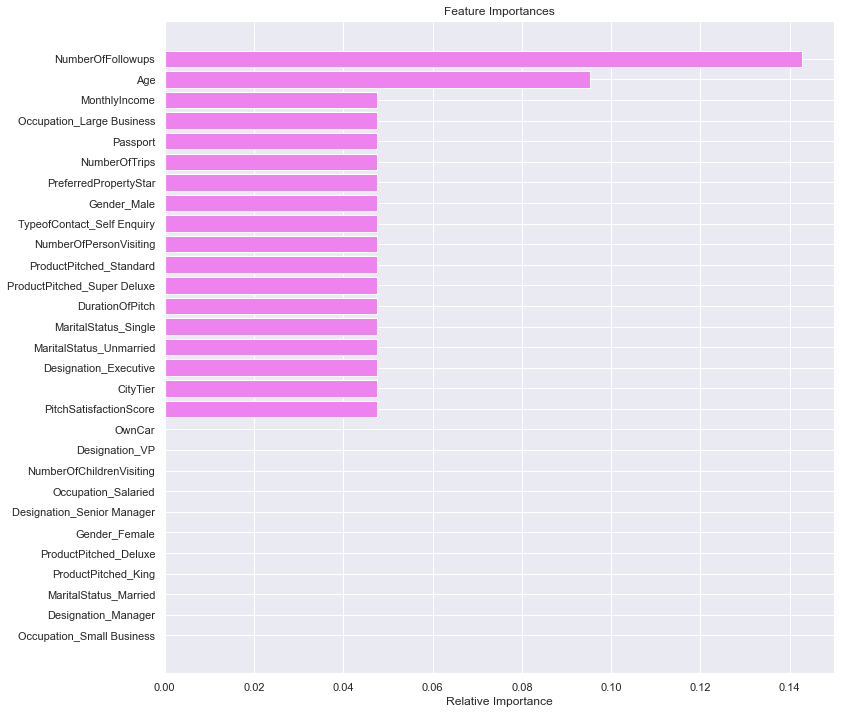

In [107]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Important Features in Tuned AdaBoosting :
* Number of follow ups
* Age
* Monthly Income
* Occupation_LargeBussiness
* Passport
* Number of Trips
* Preferred Property Star rating 
* Gender_Male
* TypeOfContact_SelfEnquiry
* NumberofPersonVisiting


## Gradient Boosting 

In [108]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [109]:
gb_estimator_score=get_metrics_score(gb_estimator,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  0.8883367436422098
Accuracy on test set :  0.858214042263122
Recall on training set :  0.46474358974358976
Recall on test set :  0.3716216216216216
Precision on training set :  0.8579881656804734
Precision on test set :  0.8333333333333334
F1 on training set :  0.6029106029106029
F1 on test set :  0.514018691588785


* The models performance has slightly bettered 

## HyperParameter Tuning

In [110]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,110,30), 
#               'subsample':[0.7,0.8,0.9,1],
#               'max_features':[0.7,0.8,0.9,1],
#               'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=80, random_state=1)

In [111]:
gb_tuned_score=get_metrics_score(gb_tuned,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  0.8804443145279158
Accuracy on test set :  0.8493524199045671
Recall on training set :  0.42467948717948717
Recall on test set :  0.3310810810810811
Precision on training set :  0.8412698412698413
Precision on test set :  0.8099173553719008
F1 on training set :  0.564430244941427
F1 on test set :  0.47002398081534774


* The Tuned Gradient Boosting Models Performance has decreased from the Gradient Boosting Model

In [112]:
print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Passport                    0.20074
Designation_Executive       0.15424
MonthlyIncome               0.11718
Age                         0.11178
DurationOfPitch             0.07700
NumberOfFollowups           0.05574
PreferredPropertyStar       0.05159
CityTier                    0.04919
MaritalStatus_Single        0.04157
PitchSatisfactionScore      0.03317
NumberOfTrips               0.02379
MaritalStatus_Unmarried     0.01582
Occupation_Large Business   0.01017
Designation_Senior Manager  0.00901
MaritalStatus_Married       0.00879
TypeofContact_Self Enquiry  0.00845
Gender_Female               0.00838
ProductPitched_Super Deluxe 0.00785
NumberOfPersonVisiting      0.00367
Designation_Manager         0.00288
Occupation_Salaried         0.00288
Gender_Male                 0.00214
Occupation_Small Business   0.00183
ProductPitched_Standard     0.00117
NumberOfChildrenVisiting    0.00055
Designation_VP              0.00042
ProductPitched_King         

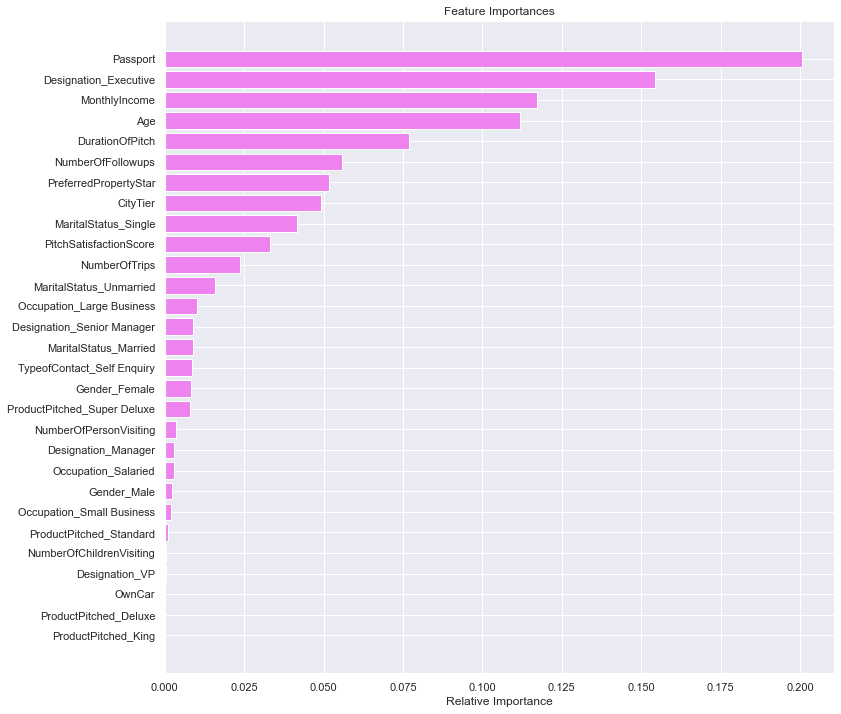

In [113]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Important Features in Tuned Gradient Boosting :
* Passport
* Designation_Executive
* Monthly Income
* Age
* DurationOfPitch
* Number of follow ups
* Preferred Property Star rating
* CityTier
* MaritalStatus_Single
* PitchSatisfactionScore


 ## XGBoost Classifier

In [114]:
xgb_estimator=XGBClassifier(random_state=1)
xgb_estimator.fit(X_train,y_train)

[19:52:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
xgb_estimator_score=get_metrics_score(xgb_estimator,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9297886843899114
Recall on training set :  1.0
Recall on test set :  0.7027027027027027
Precision on training set :  1.0
Precision on test set :  0.9327354260089686
F1 on training set :  1.0
F1 on test set :  0.8015414258188827


* The Model is performing well having a good Recall

## HyperParameter Tuning 

In [116]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100], 
#               'subsample':[0.7, 0.8, 0.9, 1],
#               'gamma':[0, 1, 3, 5],
#               'colsample_bytree':[0.7, 0.8, 0.9, 1],
#               'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

[19:52:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
xgb_tuned_score=get_metrics_score(xgb_tuned,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9297886843899114
Recall on training set :  1.0
Recall on test set :  0.7027027027027027
Precision on training set :  1.0
Precision on test set :  0.9327354260089686
F1 on training set :  1.0
F1 on test set :  0.8015414258188827


No significant Difference after Tuning 

In [118]:
print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Designation_Executive       0.14094
Passport                    0.11440
MaritalStatus_Single        0.04889
Occupation_Large Business   0.04366
ProductPitched_Super Deluxe 0.04221
CityTier                    0.03840
MaritalStatus_Married       0.03642
TypeofContact_Self Enquiry  0.03549
ProductPitched_Deluxe       0.03491
ProductPitched_Standard     0.03489
ProductPitched_King         0.03393
PreferredPropertyStar       0.03372
Gender_Male                 0.03171
NumberOfFollowups           0.03133
MaritalStatus_Unmarried     0.03094
PitchSatisfactionScore      0.03010
Age                         0.03003
DurationOfPitch             0.02992
NumberOfTrips               0.02747
Occupation_Small Business   0.02427
Occupation_Salaried         0.02411
Gender_Female               0.02408
MonthlyIncome               0.02347
OwnCar                      0.02120
NumberOfPersonVisiting      0.01856
NumberOfChildrenVisiting    0.01497
Designation_Manager         

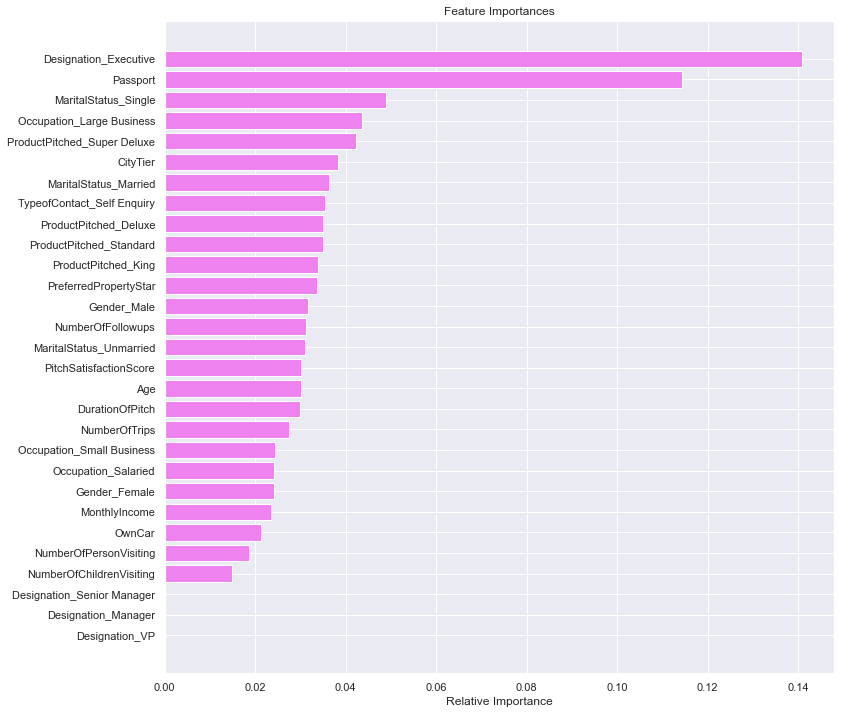

In [119]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Important Features in Tuned XGBoost:
* Designation_Executive    
* Passport
* MaritalStatus_Single
* Occupation_LargeBusiness
* ProductPitched_SuperDeluxe
* CityTier
* MaritalStatus_Married
* TypeOfContact_SelfEnquiry
* ProductPitched_Deluxe
* ProductPitched_Standard


## Stacking Model

In [121]:
estimators=[('Decision Tree', estimator),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [122]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

[19:53:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=6,
                                                       max_leaf_nodes=3,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=None,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(n_estimators=80,
                                                           random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylev...
                                                 importance_type='gain',
                                                 interaction_constraints=None,
         

In [123]:
stacking_estimator_score=get_metrics_score(stacking_estimator,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  0.997076878105817
Accuracy on test set :  0.9243353783231084
Recall on training set :  0.9919871794871795
Recall on test set :  0.7533783783783784
Precision on training set :  0.9919871794871795
Precision on test set :  0.8544061302681992
F1 on training set :  0.9919871794871795
F1 on test set :  0.800718132854578


* The Model is Performing Very well 

## Comparing All Models

In [125]:
# defining list of models
models = [dTree, estimator, rf_estimator, rf_tuned, ab_classifier, ab_tuned, gb_estimator, gb_tuned, xgb_estimator,\
         xgb_tuned, stacking_estimator]


# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])


In [126]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost Classifier', 'Tuned AdaBoost Classifer',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier','Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,'Train_F1_Score':f1_train,'Test_F1_Score':f1_test}) 

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_Score,Test_F1_Score
0,Decision Tree,1.00000,0.89571,1.00000,0.70608,1.00000,0.76000,1.00000,0.73205
1,Tuned Decision Tree,0.83251,0.81527,0.36859,0.31081,0.56235,0.57862,0.44530,0.40440
2,Random Forest,1.00000,0.90252,1.00000,0.55068,1.00000,0.94220,1.00000,0.69510
3,Tuned Random Forest,1.00000,0.92297,1.00000,0.67230,1.00000,0.92558,1.00000,0.77886
4,AdaBoost Classifier,0.85092,0.82958,0.33013,0.27365,0.69128,0.69828,0.44685,0.39320
5,Tuned AdaBoost Classifer,0.85180,0.82754,0.28686,0.24324,0.74274,0.71287,0.41387,0.36272
6,Gradient Boosting Classifier,0.88834,0.85821,0.46474,0.37162,0.85799,0.83333,0.60291,0.51402
7,Tuned Gradient Boosting Classifier,0.88044,0.84935,0.42468,0.33108,0.84127,0.80992,0.56443,0.47002
8,XGBoost Classifier,1.00000,0.92979,1.00000,0.70270,1.00000,0.93274,1.00000,0.80154
9,Tuned XGBoost Classifier,1.00000,0.92979,1.00000,0.70270,1.00000,0.93274,1.00000,0.80154


- Stacking Classifier model is the best model here. It has the highest recall on test of 75.33% 
- DecissionTree, XGBoost Classifier and Tuned XGBoost are the top 3 models. They are all giving similar performance.

### Business Recommendations

* We have been able to build a predictive model that the Tourism company can deploy to identify customers who will be interested in buying the Packages.
* Factors that have an impact on purchasing the Packages are : Monthly Income, Designation,Passport, Occupation,City Tier.

Company should pitch Super Deluxe and Deluxe to Customers who are:
* Executives in their designations
* Have a Passport
* Marital Status is Single/Married
* Living in Tier 2 and Tier 3 Cities
* Occupation Large Businesses 
* Having Higher monthly income
* Having 2 children 
* Age between 28-40 years

Compnay should Pitch Standard and Basic to customers who are :

* Senior Managers and Managers in their designation
* Have a passport
* Marital Status Single/Married
* Living in Tier 2 or Tier 3 Cities 
* Occupation Small Bussiness or salaried 
* Have a monthly income of about 20000
* Having 1 child
* Age between 28-40 years 



